### - Exercici 1
#### Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
Facebk= pd.read_csv ("/Users/esthersanroma/Desktop/DATA SCIENCES/Publicacions Facebook Thailandia.csv")
Facebk

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [57]:
Facebk.shape

(7050, 16)

In [58]:
Facebk.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [59]:
Facebk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [60]:
Facebk.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Eliminem columna1,2,3 i 4 no tenen informació

In [61]:
Facebook=Facebk.drop(["Column1", 'Column2', 'Column3',"Column4" ], axis=1)
Facebook

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [62]:
Facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [63]:
Facebook.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [64]:
facebook01=Facebook.copy()

 Convertim la columna "status_published" a un objecte "datetime" i extraurem dia, mes, any i hora.

In [65]:
from datetime import datetime

facebook01['status_published'] = pd.to_datetime(facebook01['status_published'])

facebook01['day'] = facebook01['status_published'].dt.day
facebook01['month'] = facebook01['status_published'].dt.month
facebook01['year'] = facebook01['status_published'].dt.year
facebook01['hour'] = facebook01['status_published'].dt.hour
facebook01["minutes"]=facebook01['status_published'].dt.minute
facebook01

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,hour,minutes
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,22,4,2018,6,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,21,4,2018,22,45
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,21,4,2018,6,17
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,21,4,2018,2,29
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,18,4,2018,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,24,9,2016,2,58
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,23,9,2016,11,19
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,21,9,2016,23,3
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,20,9,2016,0,43


In [66]:
facebook01.drop(['status_published' ], axis=1)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,hour,minutes
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,22,4,2018,6,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,21,4,2018,22,45
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,21,4,2018,6,17
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,21,4,2018,2,29
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,18,4,2018,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,24,9,2016,2,58
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,23,9,2016,11,19
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,21,9,2016,23,3
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,20,9,2016,0,43


In [67]:
facebook01["year"]. value_counts()

2018    2550
2017    2253
2012     589
2016     588
2013     500
2015     337
2014     233
Name: year, dtype: int64

In [68]:
facebook01["status_type"].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [69]:
facebook01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  day               7050 non-null   int64         
 13  month             7050 non-null   int64         
 14  year              7050 n

Preprocessar dades:status_type, farem dummy. day, month, year, hour i minutes preprocessat ciclic.    

 Apliquem codificació "dummy" a la columna "status_type" i afegim les columnes codificades al dataset original

In [70]:
facebook01_dummy = pd.get_dummies(facebook01['status_type'])
facebook01 = pd.concat([facebook01, facebook01_dummy], axis=1)
facebook01

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,...,num_angrys,day,month,year,hour,minutes,link,photo,status,video
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,...,0,22,4,2018,6,0,0,0,0,1
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,...,0,21,4,2018,22,45,0,1,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,...,0,21,4,2018,6,17,0,0,0,1
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,...,0,21,4,2018,2,29,0,1,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,...,0,18,4,2018,3,22,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,...,0,24,9,2016,2,58,0,1,0,0
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,...,0,23,9,2016,11,19,0,1,0,0
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,...,0,21,9,2016,23,3,0,1,0,0
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,...,0,20,9,2016,0,43,0,1,0,0


In [71]:
facebook02=facebook01.copy()

In [72]:
facebook02

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,...,num_angrys,day,month,year,hour,minutes,link,photo,status,video
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,...,0,22,4,2018,6,0,0,0,0,1
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,...,0,21,4,2018,22,45,0,1,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,...,0,21,4,2018,6,17,0,0,0,1
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,...,0,21,4,2018,2,29,0,1,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,...,0,18,4,2018,3,22,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,...,0,24,9,2016,2,58,0,1,0,0
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,...,0,23,9,2016,11,19,0,1,0,0
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,...,0,21,9,2016,23,3,0,1,0,0
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,...,0,20,9,2016,0,43,0,1,0,0


In [73]:
facebook02=facebook02.drop(['status_type', "status_published" ], axis=1)
facebook02.to_csv("/Users/esthersanroma/Desktop/DATA SCIENCES/dataset_preprocessat Thailandia.csv", index=False)

In [74]:
facebook02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_id      7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
 10  day            7050 non-null   int64 
 11  month          7050 non-null   int64 
 12  year           7050 non-null   int64 
 13  hour           7050 non-null   int64 
 14  minutes        7050 non-null   int64 
 15  link           7050 non-null   uint8 
 16  photo          7050 non-null   uint8 
 17  status         7050 non-null   uint8 
 18  video          7050 non-null

Les columnes "day", "month", "year", "hour" i "minutes" són variables temporals i poden ser considerades com a cícliques, ja que hi ha una relació en el cicle diari i mensual.

In [75]:
facebook02['day_sin'] = np.sin(2 * np.pi * facebook02.day/max(facebook02.day))
facebook02['day_cos'] = np.cos(2 * np.pi * facebook02.day/max(facebook02.day))

facebook02['month_sin'] = np.sin(2 * np.pi * facebook02.month/max(facebook02.month))
facebook02['month_cos'] = np.cos(2 * np.pi * facebook02.month/max(facebook02.month))

facebook02['year_sin'] = np.sin(2 * np.pi * facebook02.year/max(facebook02.year))
facebook02['year_cos'] = np.cos(2 * np.pi * facebook02.year/max(facebook02.year))

facebook02['hour_sin'] = np.sin(2 * np.pi * facebook02.hour/max(facebook02.hour))
facebook02['hour_cos'] = np.cos(2 * np.pi * facebook02.hour/max(facebook02.hour))

facebook02['minutes_sin'] = np.sin(2 * np.pi * facebook02.minutes/max(facebook02.minutes))
facebook02['minutes_cos'] = np.cos(2 * np.pi * facebook02.minutes/max(facebook02.minutes))

In [76]:
facebook03=facebook02.drop(['day', "month", "year", "hour", "minutes" ], axis=1)
facebook03.head(4)

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,day_sin,day_cos,month_sin,month_cos,year_sin,year_cos,hour_sin,hour_cos,minutes_sin,minutes_cos
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,...,-0.968077,-0.250653,0.866025,-0.5,-2.449294e-16,1.0,0.997669,-0.068242,0.000000,1.000000
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,...,-0.897805,-0.440394,0.866025,-0.5,-2.449294e-16,1.0,-0.269797,0.962917,-0.996812,0.079786
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,...,-0.897805,-0.440394,0.866025,-0.5,-2.449294e-16,1.0,0.997669,-0.068242,0.971430,-0.237327
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,...,-0.897805,-0.440394,0.866025,-0.5,-2.449294e-16,1.0,0.519584,0.854419,0.053222,-0.998583


In [77]:
facebook03.columns

Index(['status_id', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'link',
       'photo', 'status', 'video', 'day_sin', 'day_cos', 'month_sin',
       'month_cos', 'year_sin', 'year_cos', 'hour_sin', 'hour_cos',
       'minutes_sin', 'minutes_cos'],
      dtype='object')

In [78]:
facebook03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_id      7050 non-null   object 
 1   num_reactions  7050 non-null   int64  
 2   num_comments   7050 non-null   int64  
 3   num_shares     7050 non-null   int64  
 4   num_likes      7050 non-null   int64  
 5   num_loves      7050 non-null   int64  
 6   num_wows       7050 non-null   int64  
 7   num_hahas      7050 non-null   int64  
 8   num_sads       7050 non-null   int64  
 9   num_angrys     7050 non-null   int64  
 10  link           7050 non-null   uint8  
 11  photo          7050 non-null   uint8  
 12  status         7050 non-null   uint8  
 13  video          7050 non-null   uint8  
 14  day_sin        7050 non-null   float64
 15  day_cos        7050 non-null   float64
 16  month_sin      7050 non-null   float64
 17  month_cos      7050 non-null   float64
 18  year_sin

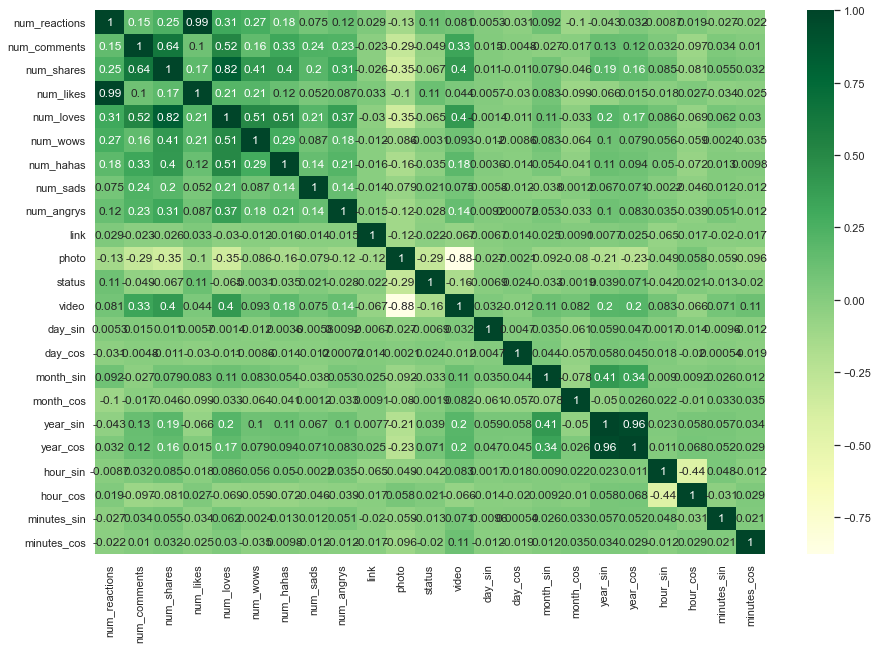

In [79]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(facebook03.corr(),cmap="YlGn", annot=True);

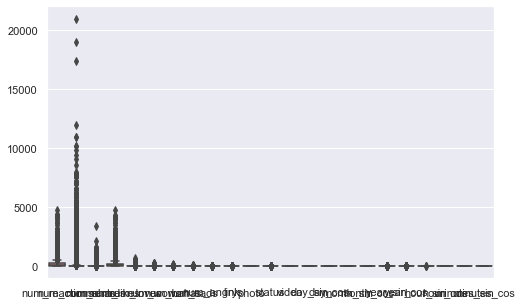

In [80]:
sns.boxplot(data=facebook03)
sns.set(rc = {'figure.figsize':(40,40)})

<Figure size 2880x2880 with 0 Axes>

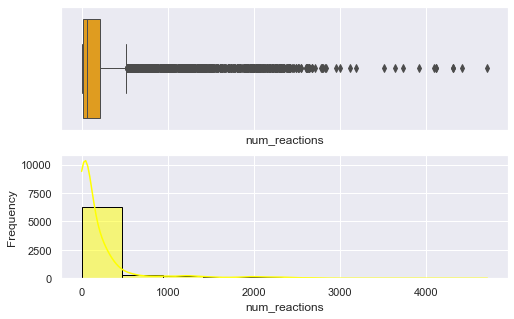

<Figure size 576x360 with 0 Axes>

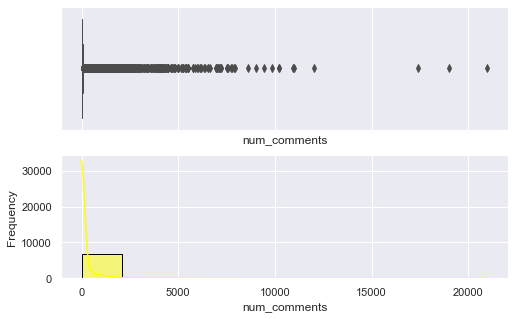

<Figure size 576x360 with 0 Axes>

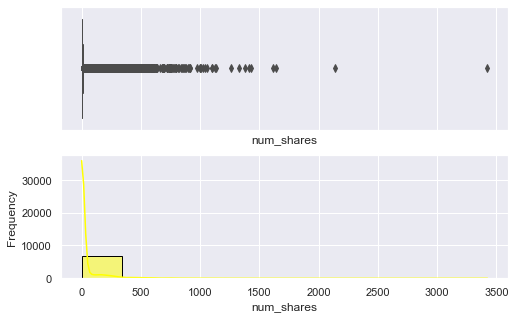

<Figure size 576x360 with 0 Axes>

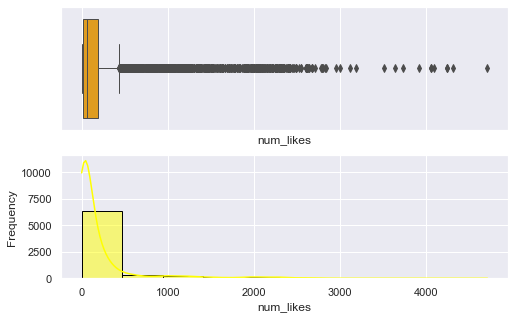

<Figure size 576x360 with 0 Axes>

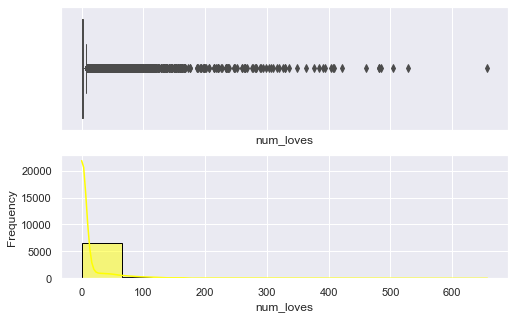

<Figure size 576x360 with 0 Axes>

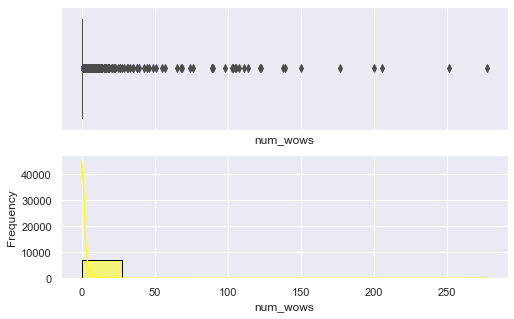

<Figure size 576x360 with 0 Axes>

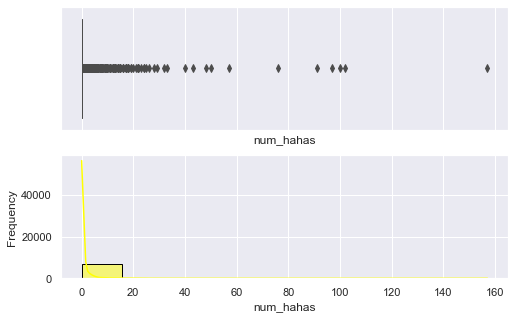

<Figure size 576x360 with 0 Axes>

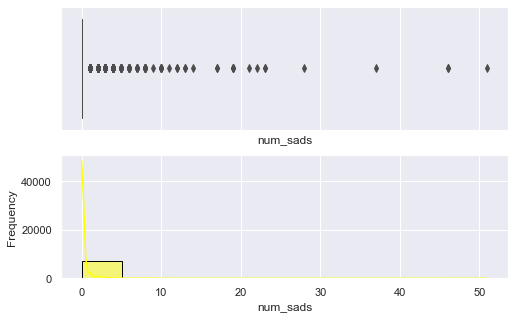

<Figure size 576x360 with 0 Axes>

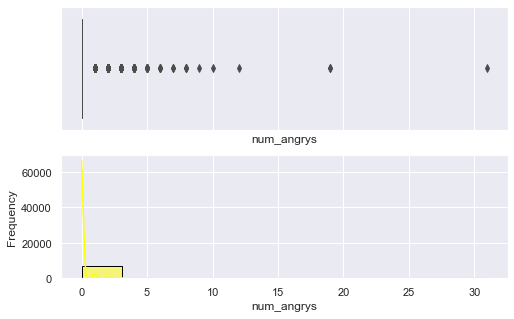

<Figure size 576x360 with 0 Axes>

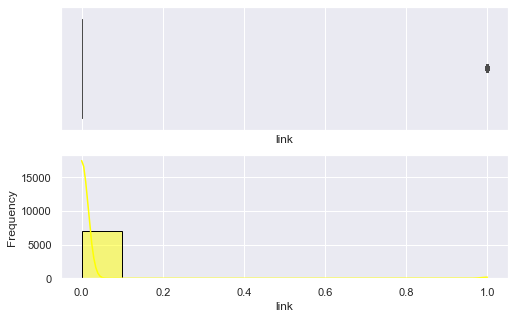

<Figure size 576x360 with 0 Axes>

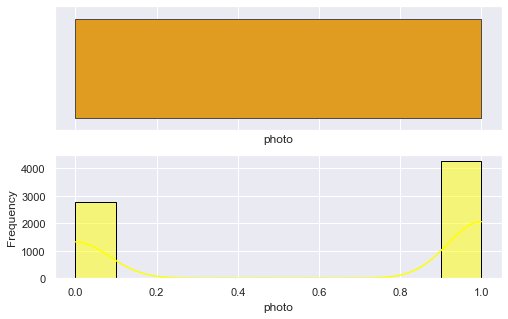

<Figure size 576x360 with 0 Axes>

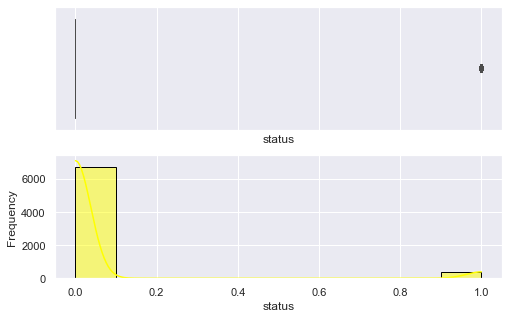

<Figure size 576x360 with 0 Axes>

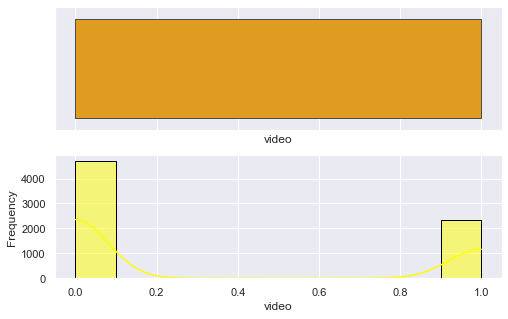

<Figure size 576x360 with 0 Axes>

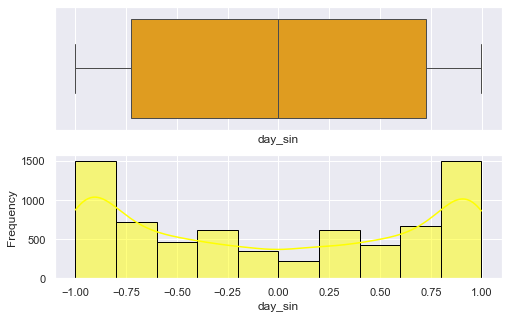

<Figure size 576x360 with 0 Axes>

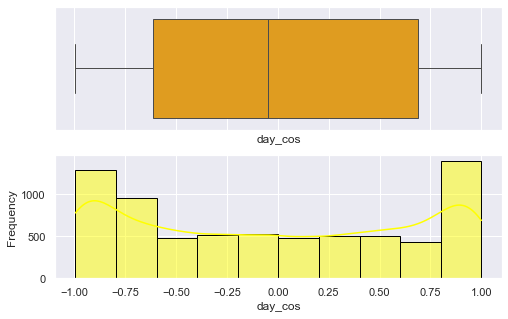

<Figure size 576x360 with 0 Axes>

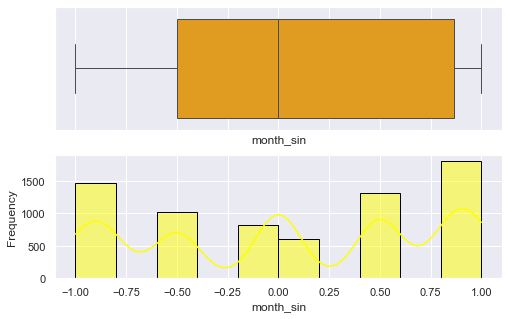

<Figure size 576x360 with 0 Axes>

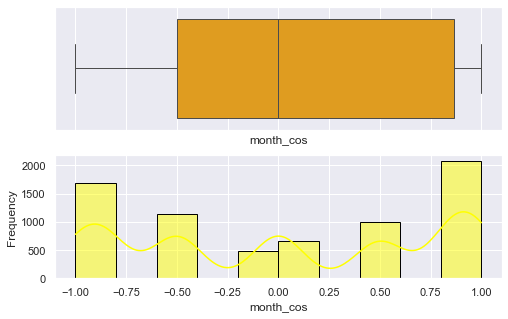

<Figure size 576x360 with 0 Axes>

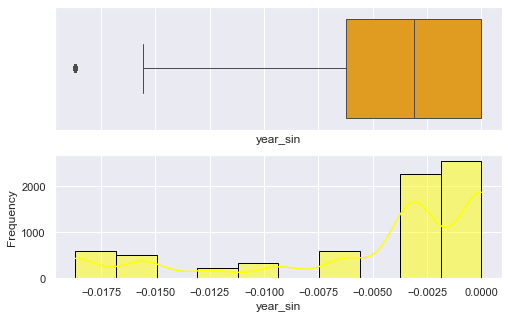

<Figure size 576x360 with 0 Axes>

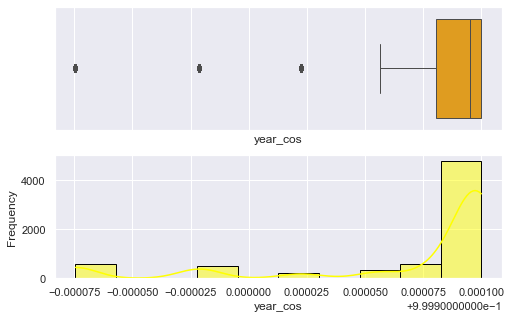

<Figure size 576x360 with 0 Axes>

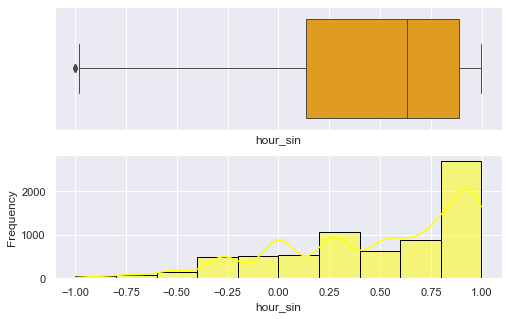

<Figure size 576x360 with 0 Axes>

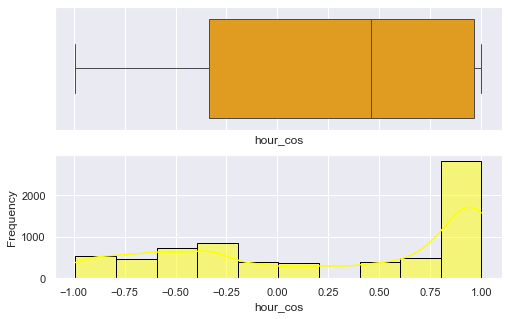

<Figure size 576x360 with 0 Axes>

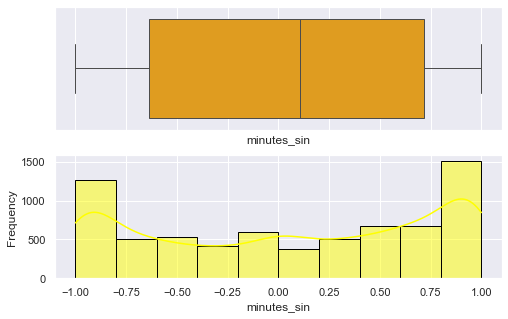

<Figure size 576x360 with 0 Axes>

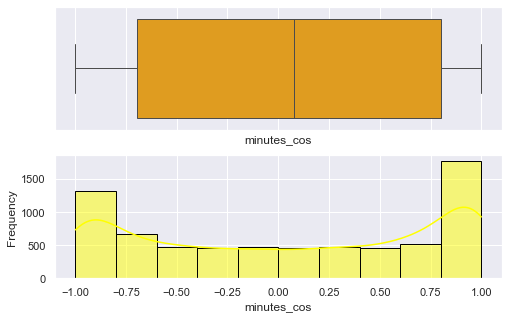

In [81]:
facebook03_excl_status_id = facebook03.drop('status_id', axis=1)
for i in facebook03_excl_status_id.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8,5)})
    f,(ax_box,ax_hist)=plt.subplots(2,sharex=True)
    plt.gca().set(xlabel=i,ylabel="Frequency")
    sns.boxplot(facebook03_excl_status_id[i], ax=ax_box, linewidth=1.0, color="orange")
    sns.histplot(facebook03_excl_status_id[i],ax=ax_hist, bins=10, kde=True, color="yellow", edgecolor="black")

Observem: 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys' totes tenen outliers. Aplicarem el preprocessat Robust Scaler.

In [82]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [83]:
columnes_Robust = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
scalerRobust= preprocessing.RobustScaler().fit(facebook03[columnes_Robust])
facebook03[columnes_Robust] = scalerRobust.transform(facebook03[columnes_Robust])

Convertim les variables unit8 a int64

In [110]:
facebook03[["link", "photo", "status", "video"]] = facebook03[["link", "photo", "status", "video"]].astype("int64")

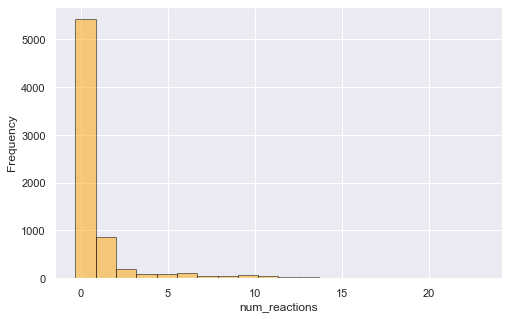

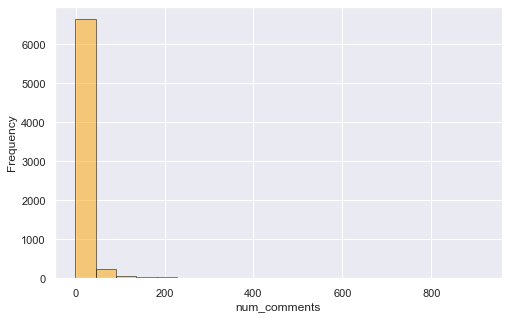

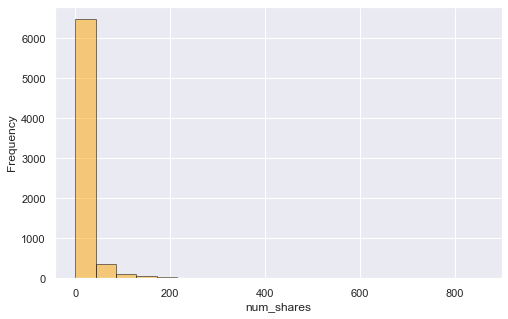

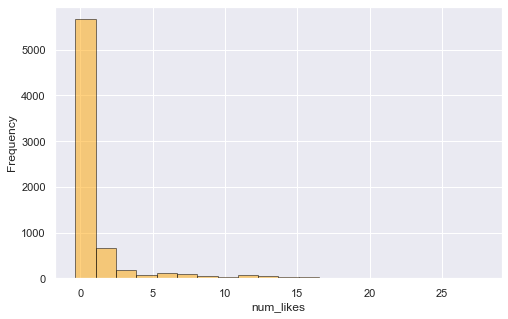

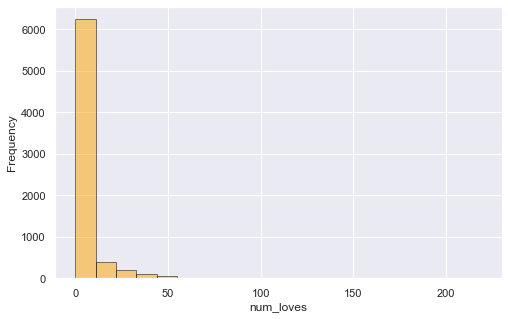

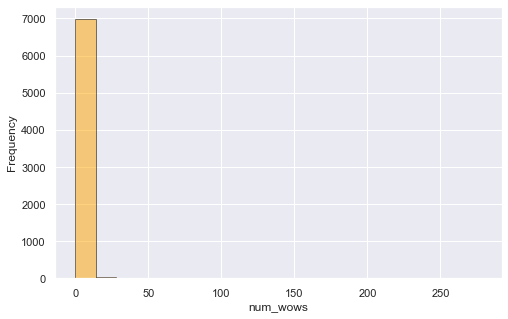

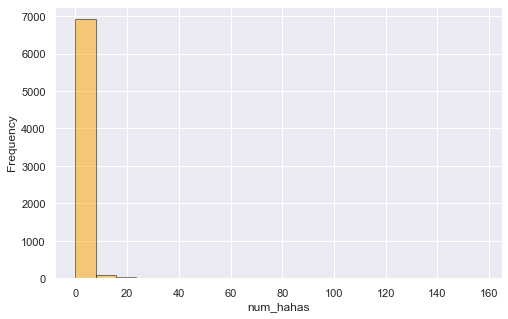

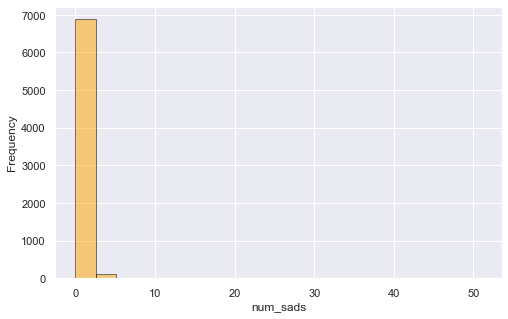

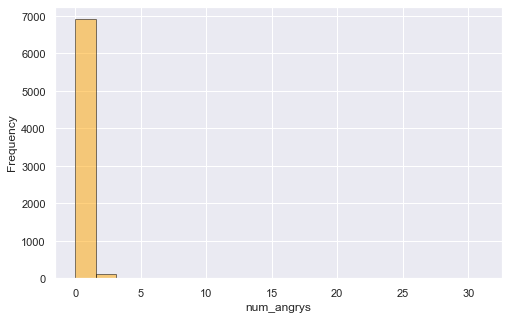

In [111]:
for col in columnes_Robust:
    plt.hist(facebook03[col], bins=20, alpha=0.5, color='orange', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [112]:
facebook03.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,...,day_sin,day_cos,month_sin,month_cos,year_sin,year_cos,hour_sin,hour_cos,minutes_sin,minutes_cos
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,...,7.050000e+03,7050.000000,7.050000e+03,7.050000e+03,7.050000e+03,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.844639,9.580697,10.005638,0.936174,4.242884,1.289362,0.696454,0.243688,0.113191,0.008936,...,-1.009920e-02,-0.019520,6.674158e-02,4.340689e-02,-5.037202e-03,0.999969,0.481881,0.237776,0.063831,0.053547
std,2.290224,38.679862,32.899991,2.679418,13.324310,8.719650,3.957183,1.597156,0.726812,0.094115,...,7.301167e-01,0.683073,6.846664e-01,7.245925e-01,6.049915e-03,0.000054,0.455518,0.709830,0.695568,0.713711
min,-0.294554,-0.173913,0.000000,-0.345753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.987165e-01,-0.994869,-1.000000e+00,-1.000000e+00,-1.868034e-02,0.999826,-0.997669,-0.990686,-0.999646,-0.998583
25%,-0.210396,-0.173913,0.000000,-0.244411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.247928e-01,-0.612106,-5.000000e-01,-5.000000e-01,-6.227101e-03,0.999981,0.136167,-0.334880,-0.638244,-0.697632
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.449294e-16,-0.050649,1.224647e-16,6.123234e-17,-3.113565e-03,0.999995,0.631088,0.460065,0.106293,0.079786
75%,0.789604,0.826087,1.000000,0.755589,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.247928e-01,0.688967,8.660254e-01,8.660254e-01,-2.449294e-16,1.000000,0.887885,0.962917,0.716457,0.802712
max,23.022277,912.434783,856.000000,27.731744,219.000000,278.000000,157.000000,51.000000,31.000000,1.000000,...,9.987165e-01,1.000000,1.000000e+00,1.000000e+00,-2.449294e-16,1.000000,0.997669,1.000000,0.999646,1.000000


In [113]:
facebook03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_id      7050 non-null   object 
 1   num_reactions  7050 non-null   float64
 2   num_comments   7050 non-null   float64
 3   num_shares     7050 non-null   float64
 4   num_likes      7050 non-null   float64
 5   num_loves      7050 non-null   float64
 6   num_wows       7050 non-null   float64
 7   num_hahas      7050 non-null   float64
 8   num_sads       7050 non-null   float64
 9   num_angrys     7050 non-null   float64
 10  link           7050 non-null   int64  
 11  photo          7050 non-null   int64  
 12  status         7050 non-null   int64  
 13  video          7050 non-null   int64  
 14  day_sin        7050 non-null   float64
 15  day_cos        7050 non-null   float64
 16  month_sin      7050 non-null   float64
 17  month_cos      7050 non-null   float64
 18  year_sin

In [115]:
from sklearn.decomposition import PCA

In [116]:
X = facebook03.drop('status_id', axis=1)
y = None

Per calcular el millor valor per a n_components en PCA, es pot utilitzar la metodologia de l'anàlisi de variança explicada (EVA), que mesura la proporció de variança explicada per cada component principal. Això ens permet veure quant de variança de les dades es pot explicar per cada component principal i decidir quants components principals utilitzar.

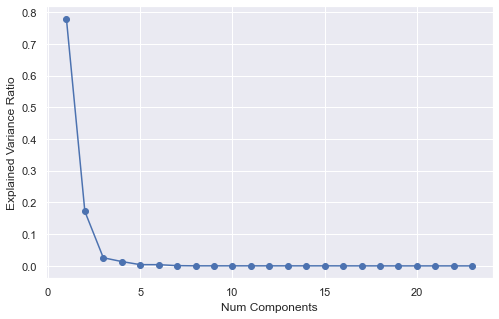

In [117]:
pca = PCA()
pca.fit(X)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Num Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

Estem determinant el nombre de components necessaris per obtenir una proporció de variància explicada determinada. Per fer-ho, primer es calcula l'índex on la proporció acumulada de variància explicada és igual o superior a la proporció desitjada (90%), després s'afegeix 1 per obtenir el nombre de components

Fem el càlcul sense gràfica utilitzant una mètrica com la variància explicada acumulada (cumulative explained variance). Aquesta mètrica mostra la quantitat total de variància explicada per les diferents components principals. El nombre òptim de components principals és aquell que explica una quantitat determinada de variància en les dades, per exemple, el 90%.

El nombre òptim de components del PCA, a suma acumulada de la variança explicada per a cada component. La idea és buscar el nombre de components que expliquen una quantitat significativa de la variança dels dades d'entrada.

Per exemple, es pot establir un threshold, com ara el 90% de la variança explicada, i triar el nombre mínim de components que satisface aquest requisit.
1er Obtenim el nombre de components necessaris per a una proporció de variància explicada determinada, 2on Obtenim el nombre de components necessaris per a una proporció de variància explicada determinada.

In [118]:
pca = PCA()
pca.fit(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
pca = PCA()
pca.fit(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
desired_explained_variance = 0.9
n_components = np.argmax(explained_variance >= desired_explained_variance) + 1 
print("n_components=",n_components)

n_components= 2


 Inicialitzar el model de PCA,  Ajustem el model a les dades X,  Transformem les dades X a les components principals

In [119]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

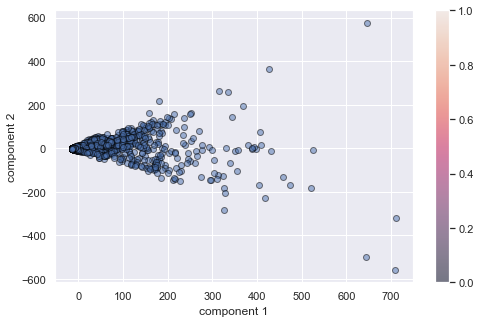

In [120]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=None, edgecolor='black', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Aplicarem l'algorisme K-means i calcularem la suma de les distàncies quadràtiques (WCSS) per a diferents valors de n_clusters. Aquesta informació es per determinar el nombre òptim de clusters per a les dades, ja que es pot veure com la WCSS disminueix en general quan s'augmenta el nombre de clusters, però a mesura que el nombre de clusters augmenta, la disminució esdevé més petita. Això es conegut com el "mètode del colze".

suma de quadrats dins del clúster, wcss 1335966.8344205916
nombre d'iteracions 23
coordenades dels centres dels clusters [[ -13.09734275   -1.76659223]
 [ 391.05099102   29.29217941]
 [ 230.35562629   -8.96944233]
 [ 103.66133972   35.87691769]
 [ 688.53628925 -458.59850645]
 [ 536.92007588  469.52616788]
 [ 188.91881111  116.89065921]
 [  36.90780865   12.96158254]
 [ 158.16146872  -73.01578739]
 [ 356.85999319 -155.01845069]]


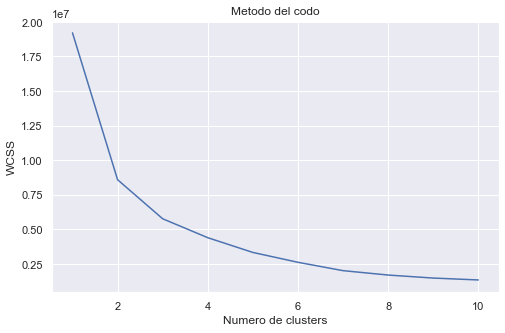

In [121]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
print("suma de quadrats dins del clúster, wcss",kmeans.inertia_)    
print("nombre d'iteracions",kmeans.n_iter_)
print("coordenades dels centres dels clusters", kmeans.cluster_centers_)

plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

El nombre òptim de clusters es determinat mitjançant el mètode del codo. busquem un "codo" a la gràfica. El nombre de clusters, el punt on la gràfica comença a decréixer més lentament és considerat el nombre òptim de clusters. En aquest cas, a partir de la gràfica generada, es pot veure que el codo es troba en algun lloc entre 2 i 3 clusters, de manera que el nombre òptim de clusters pot ser 3.

L'opció init='k-means++' es fa servir per inicialitzar els centres dels clústers de manera intel·ligent, mentre que l'opció init="random" els inicialitza de manera aleatòria. La inicialització intel·ligent k-means++ tendeix a proporcionar una millor solució final que la inicialització aleatòria, ja que escull els punts inicials de manera estratègica per reduir la suma de les distàncies quadràtiques fins als clústers.

In [122]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X_pca)
predictions = kmeans.predict(X_pca)

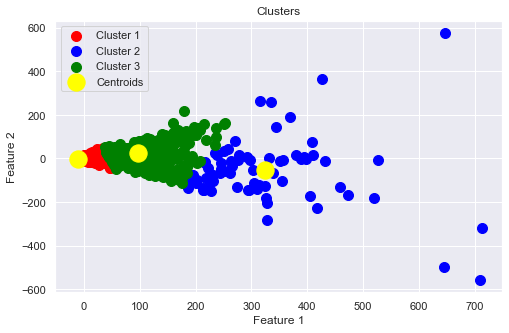

In [123]:
plt.scatter(X_pca[kmeans.labels_ == 0, 0], X_pca[kmeans.labels_ == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[kmeans.labels_ == 1, 0], X_pca[kmeans.labels_ == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[kmeans.labels_ == 2, 0], X_pca[kmeans.labels_ == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### - Exercici 2
#### Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

Apliquem l'algorisme de clustering jeràrquic a les dades utilitzant la funció "AgglomerativeClustering" de scikit-learn.
Especifiquem el nombre de clusters que voleu utilitzant l'argument "n_clusters".
Apliquem el model a les dades amb "fit".
Podem obtenir les etiquetes de cluster per a cada registre utilitzant el mètode "labels_".

In [124]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [125]:
X = facebook03.drop('status_id', axis=1).values
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)
labels = agg_clustering.labels_

Fem un dendrogam per visualitzar. El dendrogram es un resum gràfic de la solució de clúster.

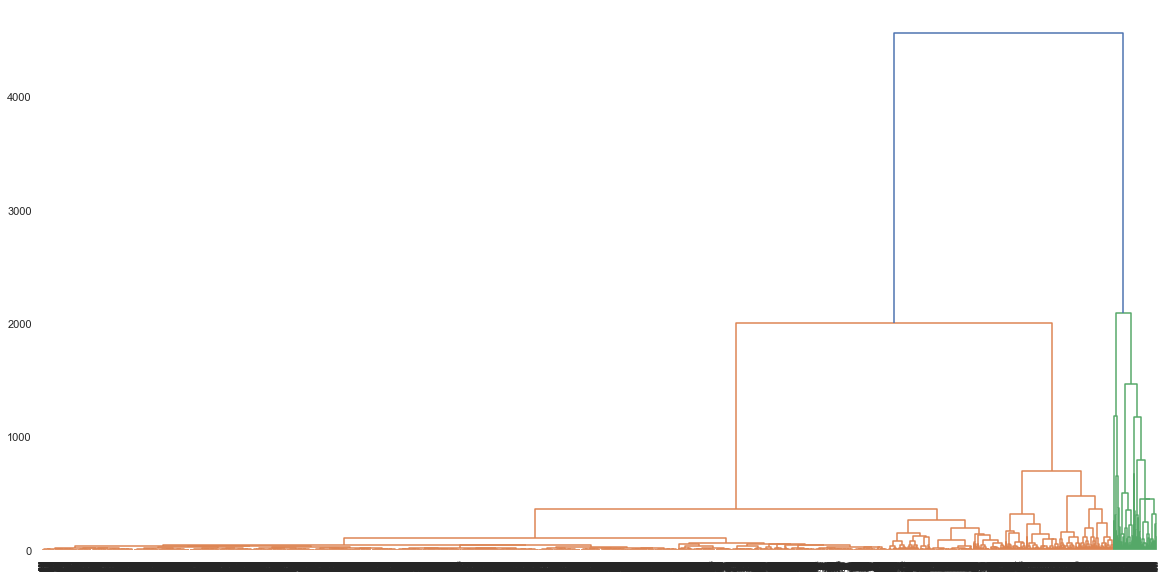

In [126]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

L'eix X conté les mostres i l'eix Y representa la distància entre aquestes mostres. La línia vertical amb distància màxima és la línia blava.

In [127]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

### - Exercici 3
#### Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [128]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

In [129]:
silhouette_avg = silhouette_score(X, y_hc)
print("El punt de Silhouette mitjà per els clusters és :", silhouette_avg)

El punt de Silhouette mitjà per els clusters és : 0.8765824275937918


Aquesta funció retorna un nombre entre -1 i 1, on valors més properes a 1 indiquen una major adequació del clustering.
El punt de Silhouette mitjà per als clusters és de 0.8765, el que indica una alta similitud dins dels clusters i una baixa similitud amb objectes d'altres clusters, el que suggereix un bon ajustament del clustering.

In [130]:
sample_silhouette_values = silhouette_samples(X, y_hc)
print("valors de silhouette per a cada punt de X:",sample_silhouette_values)

valors de silhouette per a cada punt de X: [0.50621722 0.94558077 0.88177486 ... 0.94569145 0.93458183 0.94523438]


 llista de valors de silhouette per a cada punt de dades en el conjunt de dades X. El valor de silhouette per a cada punt de dades representa la seva propietat a l'agrupament al qual està assignat. Un valor de silhouette més alt indica una millor assignació al grup i una millor separació de grups.

In [131]:
for valors in sample_silhouette_values:
    print(valors)

0.5062172162468846
0.9455807680316014
0.8817748593283559
0.9461651375221054
0.9423009787365031
0.9447621467706284
0.7591313544349887
0.8454567328633341
0.9449552590367638
0.9461199718553535
0.9436223547770328
0.9387240143479476
0.9424449840555386
0.9429197235326371
0.9400576394322767
0.9092736148815308
0.8593093106391851
0.8997112619005265
0.9003122678061395
0.9458832690995388
0.9393984612903882
0.9420337124512613
0.9443316702982324
0.9451799305830282
0.9442569774460863
0.945025635849691
0.9401189639149602
0.9395958965251789
0.9441502080362159
0.8907813424005465
0.9445206456951928
0.9436572066600429
0.9436194396766272
0.9431448374671552
0.9457707765744001
0.9399740374584171
0.9187454839939599
0.9414245163341252
0.9448936736568263
0.8953337654482525
0.9300490360317467
0.9338140245200794
0.9010130823179316
0.8947388257735653
0.9351592139451543
0.8528136709442964
0.9243697839623148
0.9351275701412639
0.8909834543640929
0.8409003613670757
0.9464972651620899
0.9229214573625354
0.94157277858

0.8971787098416524
0.8290593904687935
0.8985565139081776
0.8908916593992937
0.8377352415763769
0.9048695100602526
0.7887461218638124
0.900380237914093
0.8771807949871595
0.8335922328149227
0.8784131052098697
0.9106869656344088
0.8666680082013529
0.8578345893664118
0.8988794601867466
0.8898923354696621
0.9216469012965958
0.872091991466286
0.8913909759653486
0.8667488893939432
0.8977335481365589
0.8995383282232788
0.8919382405722264
0.8117510975304695
0.8854234350010616
0.775748307543851
0.8992440222473739
0.8871308268059478
0.8821150685201077
0.8888546142744108
0.8914087346573767
0.8282511465451632
0.9211570010667942
0.8851977530574306
0.89792916232606
0.9237356054463337
0.917678103719966
0.891487787069165
0.9007999570329874
0.9456849544273703
0.9457488661838409
0.9460187608403746
0.8884837629888703
0.8995082520592782
0.8888586049688362
0.8834573963434778
0.8886162586306878
0.9019789024664598
0.8967023682881649
0.8848784516305452
0.8991595251302662
0.8911805147899633
0.887304040250674
0

0.9455092195017694
0.9456650405632202
0.9454869457040708
0.9460792384625549
0.9461867801599138
0.9451793872280609
0.9458567194935809
0.946095245456285
0.9461487513634571
0.9461676311168339
0.9457020899940433
0.9458098929727188
0.945911149079446
0.9460261602674666
0.9460975564917953
0.9461467207367952
0.9459426385733243
0.9457161454698766
0.9458608906587597
0.9459010785555885
0.9459780625439287
0.9461047895179362
0.9461531197366914
0.9459901758594722
0.9460970142428053
0.9451899395305418
0.9462376746738579
0.9463191577427864
0.9460051954978094
0.9457840178309199
0.9461553167818038
0.9460686172549304
0.9451553124845691
0.9453104465843875
0.9460320066312896
0.9455153621107759
0.9457260732727749
0.9456129820151481
0.9456031761381802
0.9455861301594245
0.9459578230564716
0.9461507566199032
0.9457473708536781
0.945243641260444
0.9455769603170392
0.9454036708323066
0.945988998162861
0.9461422032073515
0.9456034285205279
0.9457952092747115
0.9458839220395542
0.9460555445526002
0.94566019322877

0.25221800258814536
0.9447964710237203
0.9459873270788495
0.9460203865573262
0.9424714157875741
0.9458654835433097
0.9459210034842719
0.9460635134433322
0.9459474159404554
0.9458438282952603
0.9464667831558452
0.9462041101857488
0.9392224549302751
0.945743275518973
0.9457627975387718
0.9463159765297917
0.9420357271346516
0.9453611714421514
0.9295855340502062
0.9461763320589619
0.9451549913365573
0.9457074589761819
0.933928820954352
0.9461634748813561
0.9433646074530685
0.9447750173090979
0.9454736065669657
0.9463224944904984
0.9432293236919579
0.9458163886442251
0.9454179342846346
0.9463630991343615
0.9346035994527637
0.9456522205401533
0.6473493785054322
0.9464800991535546
0.26779327396747915
0.945586160475111
0.9334844071797903
0.9458293306715299
0.9435786020179696
0.9452642771116362
0.9457143149007459
0.9323543685560887
0.9460490200087158
0.9459383605244852
0.8248391913978038
0.9287761409234001
0.9167904939431237
0.8789192603511553
0.8342443653828372
0.7506173769227871
0.94329439276

0.9448358278440071
0.945331654054084
0.9450046887413737
0.9449518775265436
0.9451767070635062
0.9450977961739595
0.9450568112426264
0.9453555814385479
0.9452591820238603
0.9449978537718792
0.9450148516990364
0.9450188317011905
0.9452535239811681
0.9448372941847337
0.9451020889398959
0.9452185098789548
0.9448509040205876
0.9450257486022203
0.9452786751390888
0.9447864326509156
0.9447831220707672
0.9447826541618208
0.9446789246180194
0.9449552172064098
0.9448573784000507
0.9453005482324002
0.9452290295056844
0.9450620179003579
0.9453177869644238
0.9451617833049994
0.9451005583240981
0.9451871263859245
0.9446929941813831
0.9446968751559339
0.9453936470764566
0.5082511521993233
0.9449752824628762
0.6443209424536674
0.9449589967199319
0.9450381503767857
0.9451919862313667
0.945277676775531
0.9454287397091299
0.9453005433075796
0.944941672424739
0.9452129258587609
0.9453697151587527
0.9451222446797064
0.9452937455777685
0.9460783855973491
0.9450901943143682
0.9452373446822365
0.9451703563627

0.797376568498967
0.8616221426959559
0.9455658847377595
0.9457442654111968
0.7519968462457791
0.9278040160653683
0.7796936371854445
0.9448193927192751
0.9449871082692418
0.6479728472982278
0.9462633377195293
0.9415834475435533
0.41987498382442634
0.9459225296978813
0.8537265632525611
0.9461080661380444
0.7589041619980427
0.9447597593351778
0.9446865502963654
0.9447637686499664
0.699091192090405
0.8764177675974105
0.9458521502196308
0.9459902405797271
0.5656330629212294
0.9456494334583031
0.7626739274133835
0.7374361959242562
0.9452158927690686
0.945875204971987
0.5769450093499073
0.7391176640917313
0.536996799721379
0.9460044619263577
0.9460195021648942
0.7725099864705081
0.6711842106915358
0.944995796977403
0.9457357188716384
0.9457084023804287
0.6802754477443367
0.9454732199685402
0.9425210857622236
0.9458632743524974
0.6755542717443604
0.7397335658022552
0.9456516242656552
0.9454970877024426
0.9458276171772552
0.7149241972320567
0.9459299511997584
0.9458818125984169
0.63368316165138

0.4153548507937461
0.9460441250452402
0.944963150035889
0.9460230314618918
0.9451509658708889
0.9450832471344635
0.36474356593396484
0.9459268118298241
0.6804127417551431
0.7588199732546222
0.9459502359105372
0.9459745416961596
0.3019563985522991
0.9458020292224053
0.9456712642385473
0.9457921985797972
0.7461058516740241
0.9458781488017178
0.9457793678584686
0.9458340403476737
0.9453321256832318
0.3024405760794923
0.8432392347030055
0.9460280084346996
0.9459800394485097
0.9459000913947285
0.9453060449262594
0.3185038570487719
0.9456578244730247
0.9457387141612328
0.7840322468935353
0.9458520762165776
0.9459888232339445
0.9453282641825606
0.3860614032899194
0.9459626614953826
0.9460102679746027
0.1800240226389576
0.3451311171647594
0.9458549458554496
0.5937503271327871
0.9462127644415343
0.9459731291458318
0.9460002543033202
0.9452342917554267
0.27582853698874105
0.946253555133212
0.9462386817485319
0.9460483174616747
0.8783611083789381
0.9452727425935434
0.3036818217958519
0.7844566328